<a href="https://colab.research.google.com/github/BaranikumarNagarajan/-Random-forest-Algorithom/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Customer-Churn-Records.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
data.shape

(10000, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [13]:
df = data.drop(columns=['RowNumber','CustomerId','Surname','Card Type'])

In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [15]:
df.shape

(10000, 14)

In [16]:
#categorical data encoding
df.select_dtypes(include = 'object').columns

Index(['Geography', 'Gender'], dtype='object')

In [18]:
Df = pd.get_dummies(df,drop_first=True,dtype=int)

In [20]:
Df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0


In [22]:
Df.shape

(10000, 15)

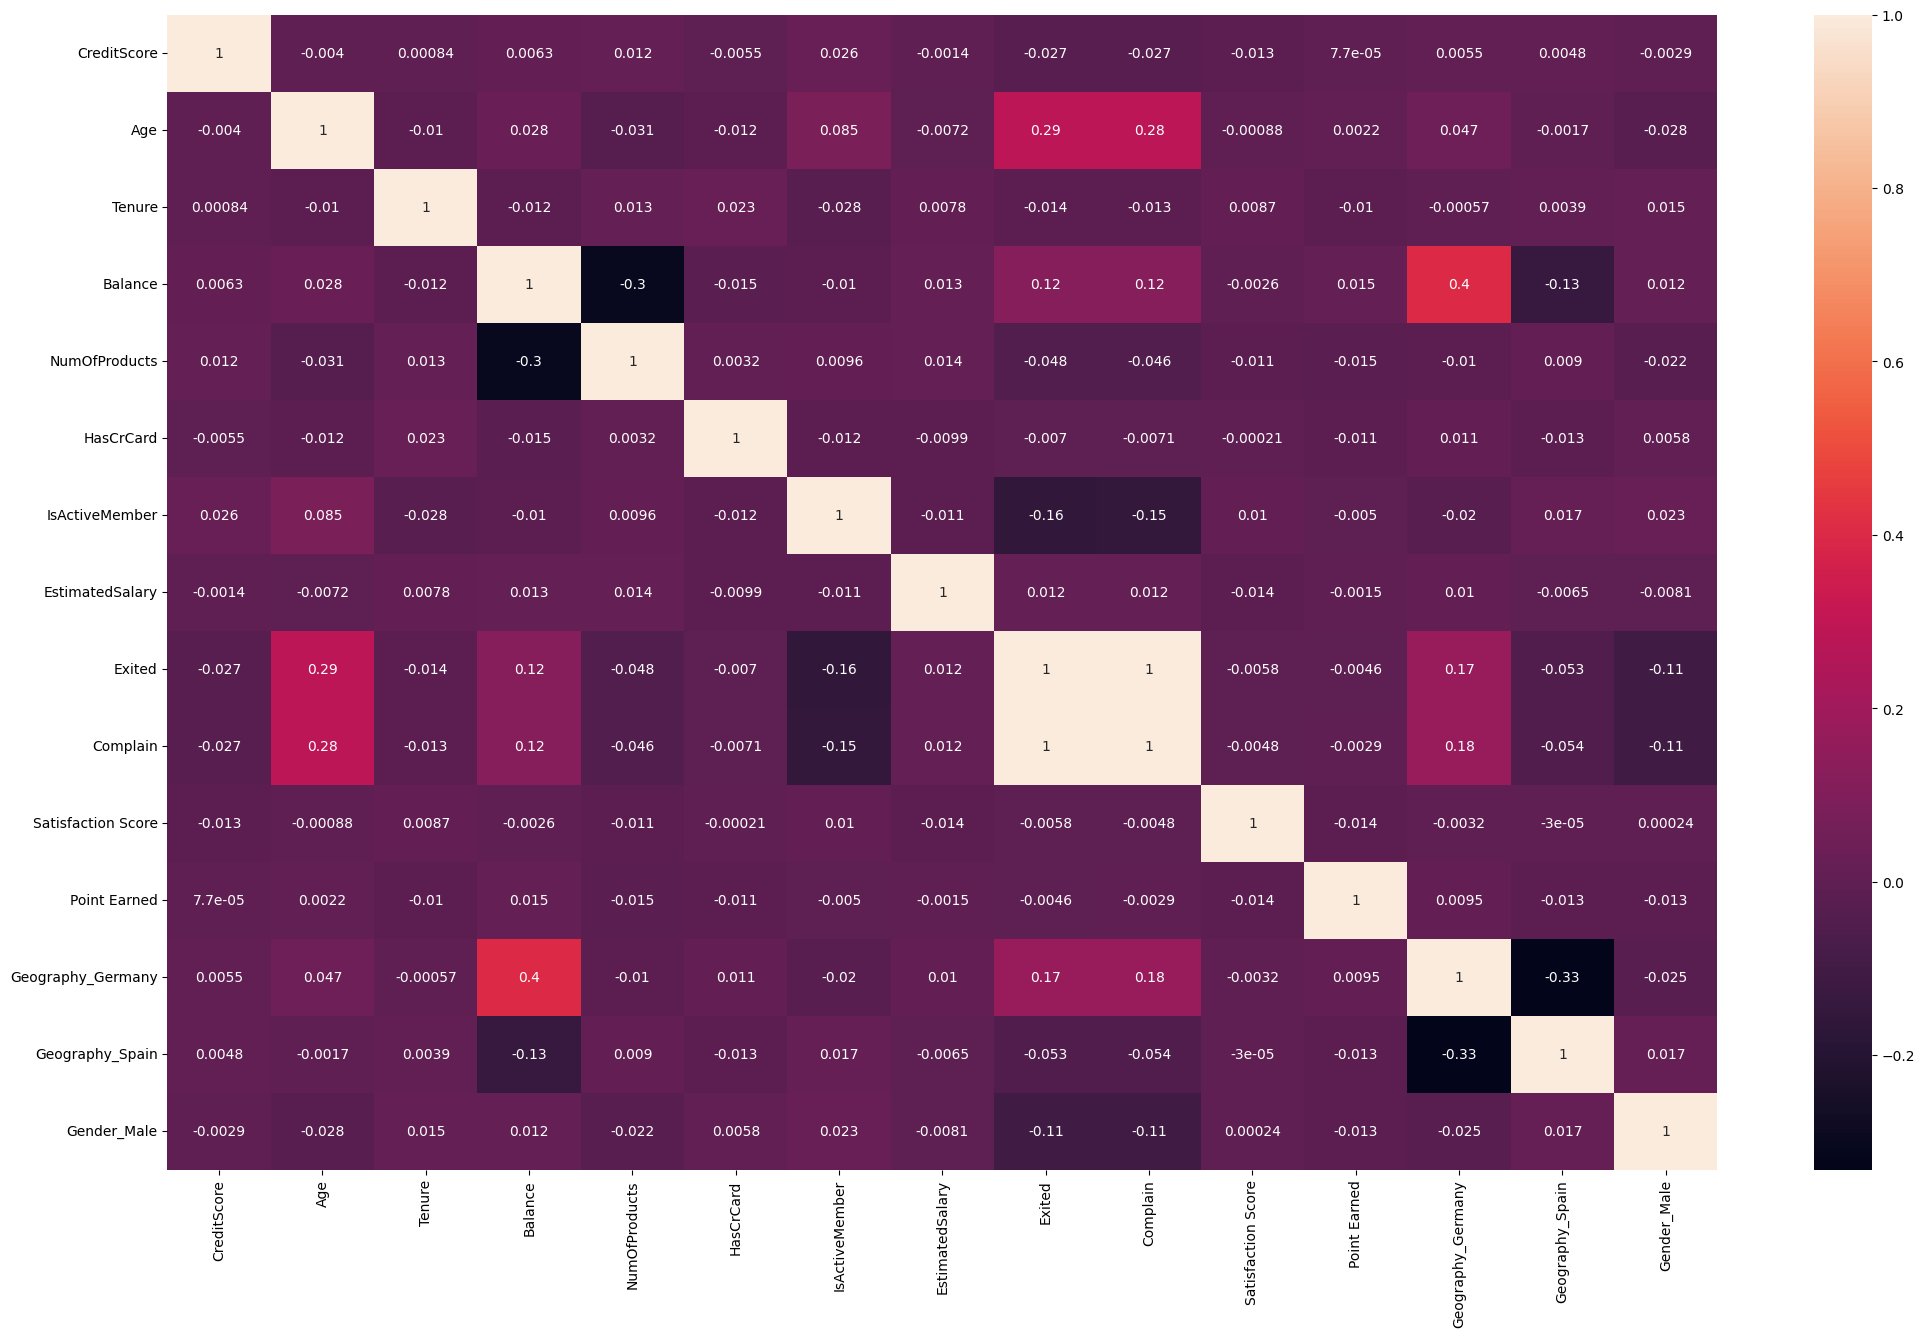

In [27]:
# heat map
plt.figure(figsize=(25,15))
sns.heatmap(Df.corr(),annot=True)
plt.show()

In [28]:
# spliting datset
x = Df.drop(columns = 'Exited')
y = Df['Exited']

In [30]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=40)

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=50,oob_score=True)
clf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True, random_state=50)

In [34]:
clf.oob_score_

0.9985555555555555

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,f1_score

In [53]:
con_mat = confusion_matrix(y_test,y_test)
print(con_mat)

[[806   0]
 [  0 194]]


In [54]:
acc = accuracy_score(y_test,y_test)
print(acc)

1.0


In [56]:
rec= recall_score(y_test,y_test)
print(rec)

1.0


In [57]:
roc= roc_auc_score(y_test,y_test)
print(roc)

1.0


In [59]:
Acc = accuracy_score(y_train,y_train_predict)
print(Acc)

1.0


In [67]:
# TEST DATA SCORE
y_predict = clf.predict(x_test)

In [68]:
Acc = accuracy_score(y_test,y_predict)
pre = precision_score(y_test,y_predict)
rec = recall_score(y_test,y_predict)
roc = roc_auc_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
output = pd.DataFrame([['Randomforest',Acc,pre,rec,roc,f1]],columns = ['Model','Accuracy','Precision','Recall','ROC','F1'])


In [69]:
output

,Model,Accuracy,Precision,Recall,ROC,F1
0,Randomforest,0.999,0.994872,1.0,0.99938,0.997429


In [70]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[805   1]
 [  0 194]]


In [71]:
# Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,x_train,y_train,cv=10)

In [73]:
print(scores)

[0.99777778 0.99555556 0.99777778 1.         0.99888889 1.
 0.99777778 0.99777778 1.         1.        ]


In [74]:
print('%0.2f accuracy with a standard deviation of %.2f'%(scores.mean(),scores.std()))

1.00 accuracy with a standard deviation of 0.00
